In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kmapper as km
from networkx import adjacency_matrix
from sklearn.preprocessing import RobustScaler
from sknetwork.topology import get_connected_components
from kmapper.jupyter import display

In [2]:
CMD = pd.read_csv('prova.csv')[["V1", "V2"]]
CMD.columns = ["Mag", "Col"]

CMD_2pop = pd.read_csv('prova_2pop.csv')[["V1", "V2"]]
CMD_2pop.columns = ["Mag", "Col"]

In [3]:
def plot_CMD(CMD):
    plt.scatter(CMD["Col"], -CMD["Mag"], s = 1, color="#18A4A6")
    plt.show()
    
def kmapper_CMD(CMD):
    mapper = km.KeplerMapper(verbose=3)
    data = CMD.to_numpy()
    projected_data = mapper.fit_transform(data, projection=[0,1], scaler = RobustScaler()) # magnitude axis
    cover = km.Cover(n_cubes=20)
    graph = mapper.map(projected_data, data, cover=cover)
    _ = mapper.visualize(graph, path_html="keplermapper_output.html",
                 title="CMD")
    display("keplermapper_output.html")
    return graph

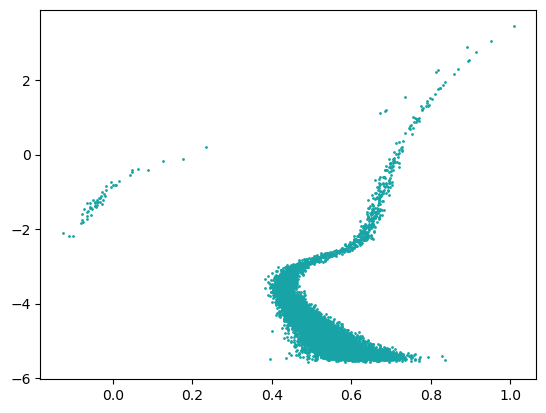

KeplerMapper(verbose=3)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: RobustScaler()
..Projecting on data shaped (10000, 2)

..Projecting data using: [0, 1]

..Scaling with: RobustScaler()

Mapping on data shaped (10000, 2) using lens shaped (10000, 2)

Minimal points in hypercube before clustering: 3
Creating 400 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

Cube_2 is empty.

   > Found 1 clusters in hypercube 3.
   > Found 1 clusters in hypercube 4.
Cube_5 is empty.

   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
Cube_9 is empty.

   > Found 1 clusters in hypercube 10.
   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
Cube_13 is empty.

   > Found 1 clusters in hypercube 14.
   > Found 1 clusters in hypercube 15.
   > Found 1 clusters in hypercube 16.
   > Found 1 clusters in hypercube 17.
   > Found 1 clusters in hypercube 18.
   > 

/opt/anaconda3/envs/persistent_homology/lib/python3.11/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [4]:
plot_CMD(CMD)
graph_1pop = kmapper_CMD(CMD)

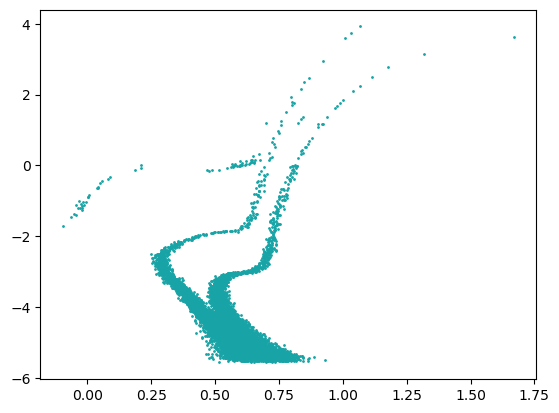

KeplerMapper(verbose=3)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: RobustScaler()
..Projecting on data shaped (10000, 2)

..Projecting data using: [0, 1]

..Scaling with: RobustScaler()

Mapping on data shaped (10000, 2) using lens shaped (10000, 2)

Minimal points in hypercube before clustering: 3
Creating 400 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 1 clusters in hypercube 1.
Cube_2 is empty.

Cube_3 is empty.

Cube_4 is empty.

Cube_5 is empty.

Cube_6 is empty.

Cube_7 is empty.

Cube_8 is empty.

Cube_9 is empty.

Cube_10 is empty.

   > Found 0 clusters in hypercube 11.
Cube_12 is empty.

Cube_13 is empty.

Cube_14 is empty.

Cube_15 is empty.

Cube_16 is empty.

Cube_17 is empty.

   > Found 1 clusters in hypercube 18.
   > Found 1 clusters in hypercube 19.
   > Found 1 clusters in hypercube 20.
   > Found 1 clusters in hypercube 21.
Cube_22 is empty.

   > Found 1 clusters in hypercube 23.
   > Found

/opt/anaconda3/envs/persistent_homology/lib/python3.11/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [5]:
plot_CMD(CMD_2pop)
graph_2pop = kmapper_CMD(CMD_2pop)

### OK this is all very cooooool. But I want to extract meaningful features out of this graph and or visualize meaningful properties of the data, like color and magnitude, on this graph. 

In [6]:
nx_graph_1pop = km.adapter.to_nx(graph_1pop)
am = adjacency_matrix(nx_graph_1pop)

/var/folders/8w/66mbmptd4ws3j45r5hp0c6w80000gn/T/ipykernel_3675/1765535880.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  am = adjacency_matrix(nx_graph_1pop)


In [7]:
len(graph_1pop['nodes'])

94

In [8]:
labels = get_connected_components(am)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

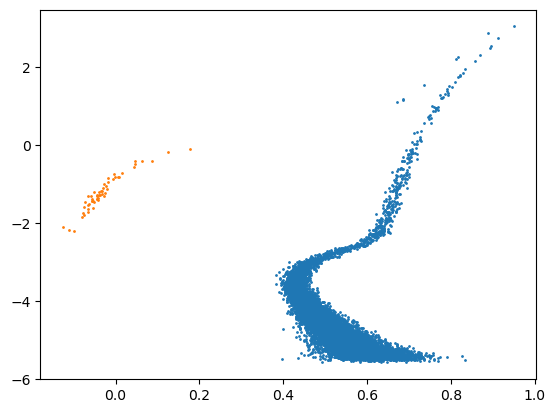

In [9]:
for i in range(labels.max()+1):
    cc = np.unique(np.concatenate([np.array(list(graph_1pop['nodes'].values())[k])
                          for k in np.arange(len(labels))[labels==i]], axis=0))
    plt.scatter(CMD["Col"][cc], -CMD["Mag"][cc], s = 1)

plt.show()

In [10]:
nx_graph_2pop = km.adapter.to_nx(graph_2pop)
am_2pop = adjacency_matrix(nx_graph_2pop)

labels_2pop = get_connected_components(am_2pop)
labels_2pop

/var/folders/8w/66mbmptd4ws3j45r5hp0c6w80000gn/T/ipykernel_3675/4277755029.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  am_2pop = adjacency_matrix(nx_graph_2pop)


array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

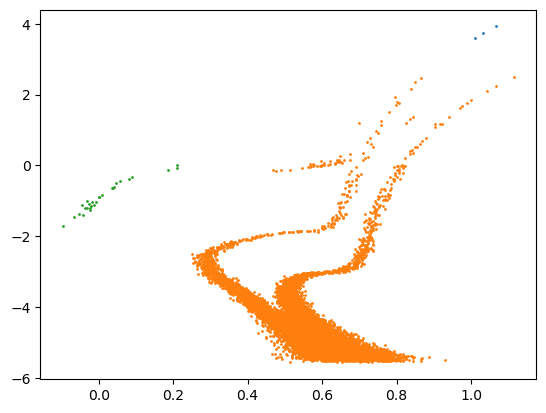

In [11]:
for i in range(labels_2pop.max()+1):
    cc = np.unique(np.concatenate([np.array(list(graph_2pop['nodes'].values())[k])
                          for k in np.arange(len(labels_2pop))[labels_2pop==i]], axis=0))
    plt.scatter(CMD_2pop["Col"][cc], -CMD_2pop["Mag"][cc], s = 1)

plt.show()